In [6]:
import os
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results/sensitivity_conjugate/'
os.chdir(working_dir)

In [7]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy import stats

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rc('text', usetex=False)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

In [8]:
import shutil

dirs = []
for d in os.listdir():
    if '__complete' in d:
        dirs.append(d)
    else:
        try:
            shutil.rmtree(d)
        except:
            pass
        
        
print(dirs)


['seed_10__dim_2__complete']


In [9]:

dir_num = len(dirs)

# N_alpha_array = jnp.array([5])
Nx_array = jnp.array([10, 50, 100])
# N_theta_array = jnp.array([30])
Ny_array = jnp.array([10, 50, 100])

# dim_all = jnp.array([2, 10])
dim_all = jnp.array([2])
seed_num = 10

confidence_level = jnp.arange(0.0, 1.01, 0.05)




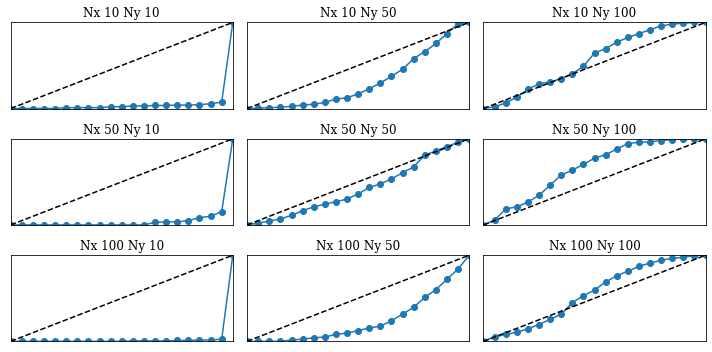

In [11]:

fig, axs = plt.subplots(len(Nx_array), len(Ny_array), figsize=(10, 5))

for i, Nx in enumerate(Nx_array):
    for j, Ny in enumerate(Ny_array):
        calibration_ = 0 * confidence_level

        for d in dirs:
            calibration = np.load(f"{d}/calibration_X_{Nx}_y_{Ny}.npy")
            calibration_ += calibration
        calibration_ /= len(dirs)

        axs[i,j].plot(confidence_level, calibration, label="Model calibration", marker="o")
        axs[i,j].plot([0, 1], [0, 1], linestyle="--", label="Ideal calibration", color="black")
        # axs[i,j].set_xlabel("Confidence")
        # axs[i,j].set_ylabel("Coverage")
        title = axs[i,j].set_title(f"Nx {Nx} Ny {Ny}")
        # title.set_color('white')
        # axs[i,j].legend()
        axs[i,j].set_xlim(0, 1)
        axs[i,j].set_ylim(0, 1)
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')

        # turn off x and y ticks
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        
plt.tight_layout()
plt.show()

In [ ]:

Fix the bug in amplittude for second stage GP, the amplitude does not work. Do a grid search

Compare the uncertainty with standard BQ.

Fix theta^\ast, with samples theta_1, \codts, \theta_T

compare \sigma^2_CBQ(\theta^\ast), and \sigma^2_BQ(\theta^\ast)

In [ ]:
find out if the posterior variance is similar to the empirical noise.
